In [235]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import interpolate
import os
import matplotlib.ticker as ticker
%config InlineBackend.figure_format = 'retina'

In [2]:
filenames = os.listdir('./Data')
filenames

['1396_up.txt',
 'Ti_exp3.txt',
 '2899_up.txt',
 'Ti_exp4.txt',
 '2805_down.txt',
 '2400_up.txt',
 'Ca_test.txt',
 '2498_up.txt',
 'Al_exp1.txt',
 'Ca_exp1.txt',
 'Ti_exp2.txt',
 '2798_up.txt',
 'Zn_exp1.txt',
 '1309_up.txt',
 '2204_down.txt',
 '2504_down.txt',
 '1699_up.txt',
 'Al_exp3.txt',
 'Al_exp2.txt',
 '1706_down.txt',
 'Ca_exp2.txt',
 '2105_down.txt',
 '1502_down.txt',
 '1804_down.txt',
 '2705_down.txt',
 '2605_down.txt',
 '2201_up.txt',
 '2097_up.txt',
 '2700_up.txt',
 'Ca_exp3.txt',
 '1601_down.txt',
 '1597_up.txt',
 'Ti_exp1.txt',
 '2298_up.txt',
 'Ca_exp4.txt',
 '2004_down.txt',
 'Ti_exp5.txt',
 '1997_up.txt',
 '2405_down.txt',
 '1501_up.txt',
 '1897_up.txt',
 'Untitled.ipynb',
 '1903_down.txt',
 '1798_up.txt',
 '2307_down.txt',
 '2599_up.txt',
 'Zn_exp2.txt']

In [3]:
np.sort(filenames)

array(['1309_up.txt', '1396_up.txt', '1501_up.txt', '1502_down.txt',
       '1597_up.txt', '1601_down.txt', '1699_up.txt', '1706_down.txt',
       '1798_up.txt', '1804_down.txt', '1897_up.txt', '1903_down.txt',
       '1997_up.txt', '2004_down.txt', '2097_up.txt', '2105_down.txt',
       '2201_up.txt', '2204_down.txt', '2298_up.txt', '2307_down.txt',
       '2400_up.txt', '2405_down.txt', '2498_up.txt', '2504_down.txt',
       '2599_up.txt', '2605_down.txt', '2700_up.txt', '2705_down.txt',
       '2798_up.txt', '2805_down.txt', '2899_up.txt', 'Al_exp1.txt',
       'Al_exp2.txt', 'Al_exp3.txt', 'Ca_exp1.txt', 'Ca_exp2.txt',
       'Ca_exp3.txt', 'Ca_exp4.txt', 'Ca_test.txt', 'Ti_exp1.txt',
       'Ti_exp2.txt', 'Ti_exp3.txt', 'Ti_exp4.txt', 'Ti_exp5.txt',
       'Untitled.ipynb', 'Zn_exp1.txt', 'Zn_exp2.txt'], dtype='<U14')

In [4]:
def read_file(directory, file_name, flag):
    f = open(directory+file_name, 'r')
    line = f.readline()
    time = []
    spc = []
    while line:
        t, s = map(float, line.replace(',', '.').split())
        time.append(t)
        spc.append(s)
        line = f.readline()
    f.close()
    spc = np.array(spc)
    time = np.array(time)
    if flag:
        return time, spc
    else:
        return spc

In [152]:
directory = "./Data/"
up = []
down = []
I_up = []
I_down = []
for name in np.sort(filenames):
    if name[-6:-4]=='up':
        spc = []
        spc = read_file(directory, name, False)
        up.append(spc)
        I_up.append(int(name[:4]))
    elif name[-6:-4]=='wn':
        spc = []
        spc = read_file(directory, name, False)
        down.append(spc)
        I_down.append(int(name[:4]))
I_up = np.array(I_up)/100
I_down = np.array(I_down)/100

In [153]:
I_calib = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
T_calib = [1547, 1631, 1707, 1776, 1841, 1904, 1964, 2022, 2078, 2133, 2186, 2239, 2290, 2341, 2389, 2437, 2484]
f = interpolate.interp1d(I_calib, T_calib, kind=3)

In [154]:
T_up = f(I_up)
T_down = f(I_down)

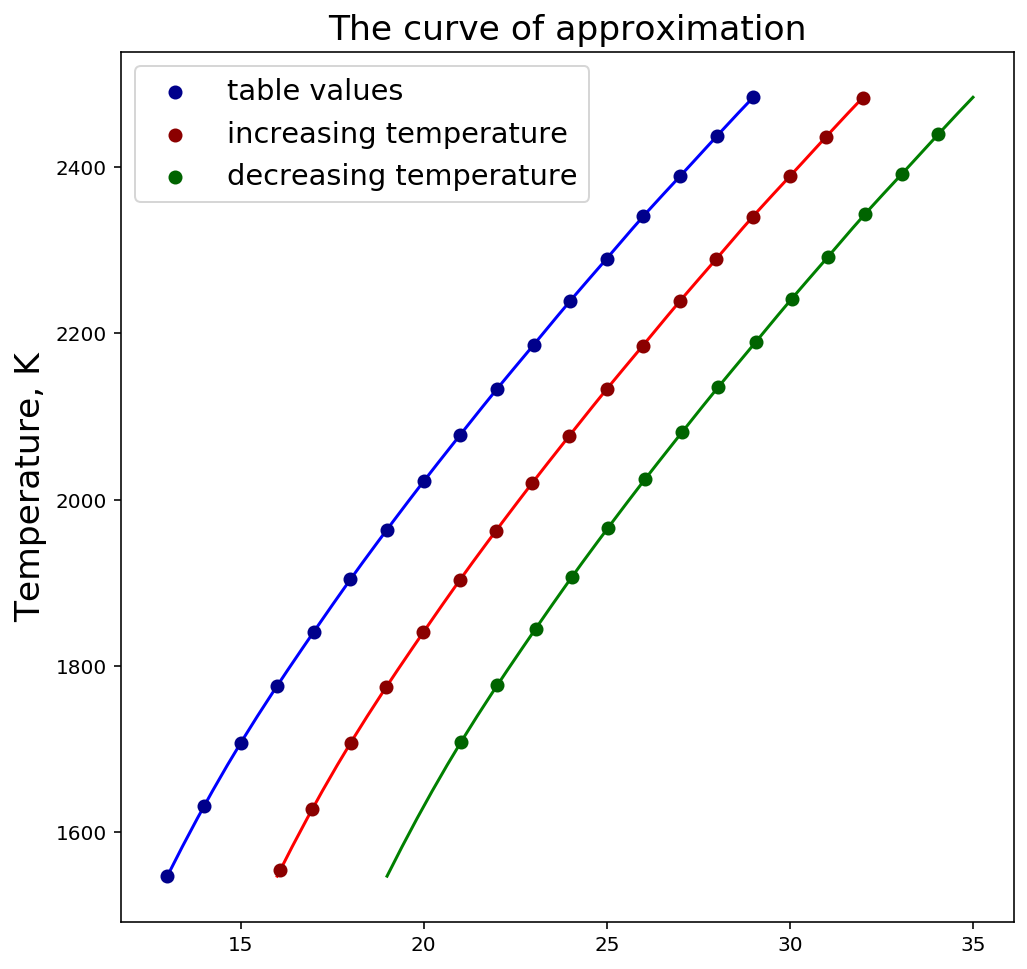

In [155]:
I_test = np.linspace(13, 29, 40)
plt.figure(figsize=(8, 8))
plt.plot(I_test, f(I_test), color='blue', zorder=1)
plt.plot(I_test+3, f(I_test), color='red', zorder=1)
plt.plot(I_test+6, f(I_test), color='green', zorder=1)
plt.scatter(I_calib, T_calib, color='darkblue', zorder=2, label='table values')
plt.scatter(I_up+3, T_up, color='darkred', label='increasing temperature', zorder=2)
plt.scatter(I_down+6, T_down, color='darkgreen', label='decreasing temperature', zorder=2)
plt.title("The curve of approximation", fontsize='xx-large')
#plt.xlabel('I, A', fontsize='xx-large')
plt.ylabel('Temperature, K', fontsize='xx-large')
plt.legend(fontsize='x-large')

# ax = plt.axes()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(50))
# plt.grid(True, which='major', linewidth = 1.2, color = 'grey')
# plt.grid(True, which='minor', linewidth = 0.5)
# plt.ylim(1500, 2500)


In [360]:
up_from, up_to = 2, -4
down_from, down_to = 0, -2

In [361]:
U_up = []
U_down = []
for arr in up:
    U_up.append(np.mean(arr))
for arr in down:
    U_down.append(np.mean(arr))

In [362]:
def lin(x, a, b):
    return a + b / x

In [363]:
def calc_R2(xdata, ydata, popt, f):    #https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
    residuals = ydata- f(xdata, popt[0], popt[1])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

In [372]:
up_opt, up_cov = sp.optimize.curve_fit(lin, T_up[up_from:up_to], U_up[up_from:up_to])
down_opt, down_cov = sp.optimize.curve_fit(lin, T_down[down_from:down_to], U_down[down_from:down_to])
a_up, b_up = up_opt[0], up_opt[1]
a_down, b_down = down_opt[0], down_opt[1]
r_squared_up = calc_R2(T_up[up_from:up_to], U_up[up_from:up_to], up_opt, lin)
r_squared_down = calc_R2(T_down[down_from:down_to], U_down[down_from:down_to], down_opt, lin)
delta_a_up, delta_b_up = np.sqrt(up_cov[0][0]), np.sqrt(up_cov[1][1])
delta_a_down, delta_b_down = np.sqrt(down_cov[0][0]), np.sqrt(down_cov[1][1])

In [373]:
sp.optimize.curve_fit(lin, T_up[up_from:up_to], U_up[up_from:up_to])

(array([ 2.31896925e+00, -3.62042028e+03]),
 array([[ 1.70065145e-05, -3.36333531e-02],
        [-3.36333531e-02,  6.70922467e+01]]))

In [374]:
sp.optimize.curve_fit(lin, T_down[down_from:down_to], U_down[down_from:down_to])

(array([ 2.52402103e+00, -3.96651681e+03]),
 array([[ 2.43407311e-04, -4.87568900e-01],
        [-4.87568900e-01,  9.86279582e+02]]))

Text(0.0004, 0.0, '$U = a + \\frac{b}{T}$\n$a_{i} = 2.319 \\pm 0.004, b_{i} = (-3.620 \\pm 0.008) \\cdot 10^3, R_{i}^2 = 0.99995$\n$a_{d} = 2.52 \\pm 0.02, b_{d} = (-3.97 \\pm 0.03) \\cdot 10^3, R_{d}^2 = 0.9994$')

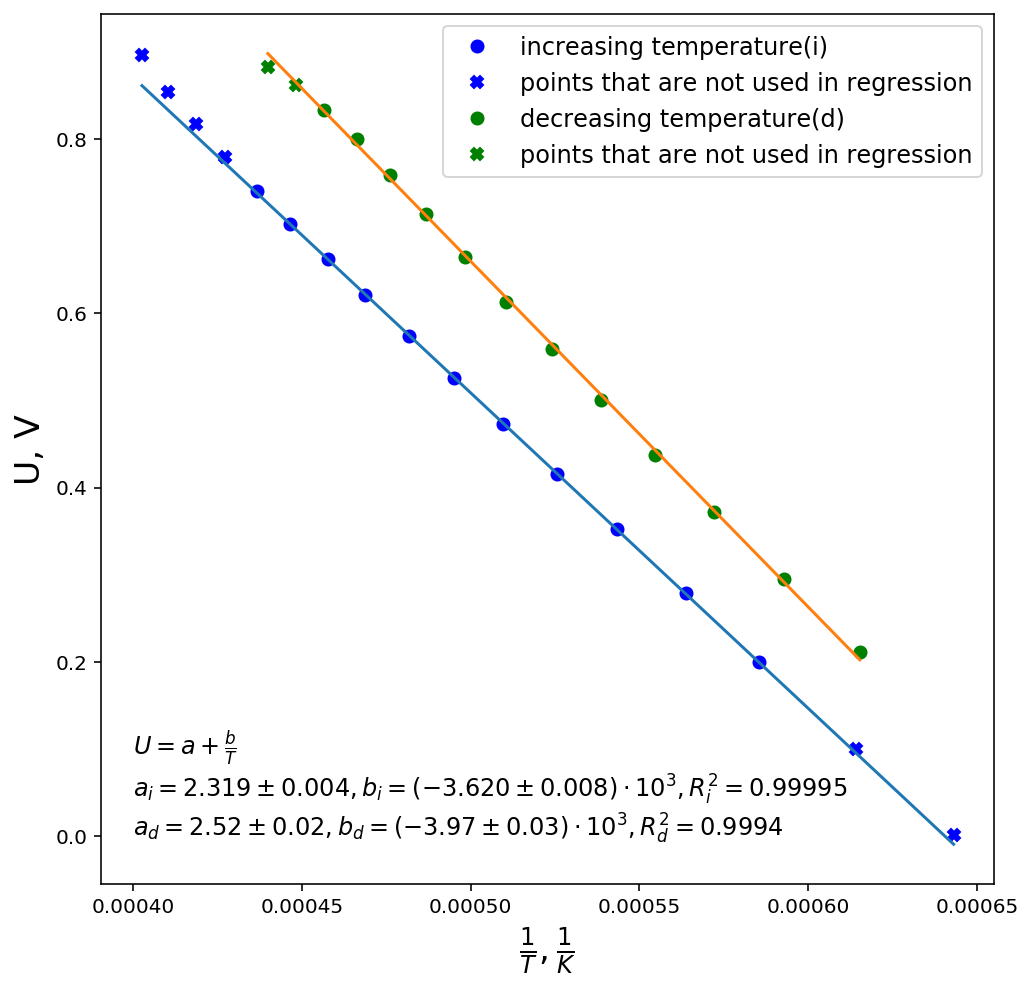

In [440]:
plt.figure(figsize=(8, 8))

plt.plot(1/T_up[up_from:up_to], U_up[up_from:up_to], 'bo', label='increasing temperature(i)')
plt.plot(1/T_up[:up_from], U_up[:up_from], 'bX', label='points that are not used in regression')
plt.plot(1/T_up[up_to:], U_up[up_to:], 'bX')
x_min, x_max = np.min(1/T_up), np.max(1/T_up)
x = np.linspace(x_min, x_max, 10)
plt.plot(x, a_up + b_up * x)

shift = 0.00003
plt.plot(1/T_down[down_from:down_to]+shift, U_down[down_from:down_to], 'go', color='g', label='decreasing temperature(d)')
plt.plot(1/T_down[:down_from]+shift, U_down[:down_from], 'gX', label='points that are not used in regression')
plt.plot(1/T_down[down_to:]+shift, U_down[down_to:], 'gX')
x_min, x_max = np.min(1/T_down), np.max(1/T_down)
x = np.linspace(x_min, x_max, 10)
plt.plot(x+shift, a_down + b_down * x)

plt.legend(fontsize='large', loc=1)
plt.xlabel("$ \\frac{1}{T}, \\frac{1}{K} $", fontsize='xx-large');
plt.ylabel("U, V", fontsize='xx-large');

s = '$U = a + \\frac{b}{T}$'
s1 = 'a_{} = {:1.3f} \\pm {:1.3f}, b_{} = ({:1.3f} \\pm {:1.3f}) \\cdot 10^3, R_{}^2 = {:1.5f}'.format('{i}', a_up, delta_a_up,'{i}',\
                                                         b_up/1000, delta_b_up/1000, '{i}',r_squared_up)
s2 = 'a_{} = {:1.2f} \\pm {:1.2f}, b_{} = ({:1.2f} \\pm {:1.2f}) \\cdot 10^3, R_{}^2 = {:1.4f}'.format('{d}', a_down, delta_a_down,'{d}', \
                                                         b_down/1000, delta_b_down/1000, '{d}', r_squared_down)
s1 = '$'+s1+'$'
s2 = '$'+s2+'$'

plt.text(0.0004, 0., s+'\n'+s1+'\n'+s2, fontsize=12)
#plt.savefig('calib_pyro.png', dpi=300)

In [394]:
C1, C2 = 3.7413*10**(-16), 1.4380*10**(-2)

In [395]:
0.375 * C2/np.log(10) / b_up

-6.468677152411722e-07

In [398]:
8/3620 * 646.8

1.4293922651933701

In [400]:
0.375 * C2/np.log(10) / b_down

-5.904255819547249e-07

In [401]:
3/397 * 590.4

4.461460957178841

In [17]:
ca = []
al = []
ti = []
zn = []
for name in filenames:
    if name[:2]=='Ca':
        spc = []
        time = []
        time, spc = read_file(directory, name, True)
        ca.append([time, spc])
    elif name[:2]=='Al':
        spc = []
        time = []
        time, spc = read_file(directory, name, True)
        al.append([time, spc])
    elif name[:2]=='Ti':
        spc = []
        time = []
        time, spc = read_file(directory, name, True)
        ti.append([time, spc])
    elif name[:2]=='Zn':
        spc = []
        time = []
        time, spc = read_file(directory, name, True)
        zn.append([time, spc])

In [18]:
def U2T(a, b, u):
    return b / (u - a)

In [19]:
for arr in ca:
    arr[1] = U2T(a_up, b_up, arr[1])
for arr in al:
    arr[1] = U2T(a_up, b_up, arr[1])
for arr in ti:
    arr[1] = U2T(a_up, b_up, arr[1])
for arr in zn:
    arr[1] = U2T(a_up, b_up, arr[1])

In [434]:
def plot_temp_curves(metal, seria, title):
    x = metal[seria][0]
    y = metal[seria][1]
    n = 15  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    yy = filtfilt(b,a,y)
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, linewidth=2, linestyle="-", label='raw signal') 
    plt.plot(x, yy, linewidth=2, linestyle="-", label='filtered signal')  # smooth by filter
    plt.legend(fontsize='xx-large')
    plt.xlabel('Time, sec', fontsize='xx-large')
    plt.ylabel('Temperature, K', fontsize='xx-large')
    plt.title('$'+title+'$', fontsize='xx-large')
    
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(50))
    plt.grid(True, which='major', linewidth = 1.7, color = 'grey')
    plt.grid(True, which='minor', linewidth = 0.5)
    
    #plt.savefig('{}_{}.png'.format(title, seria))
    plt.show()

0


/home/theodor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


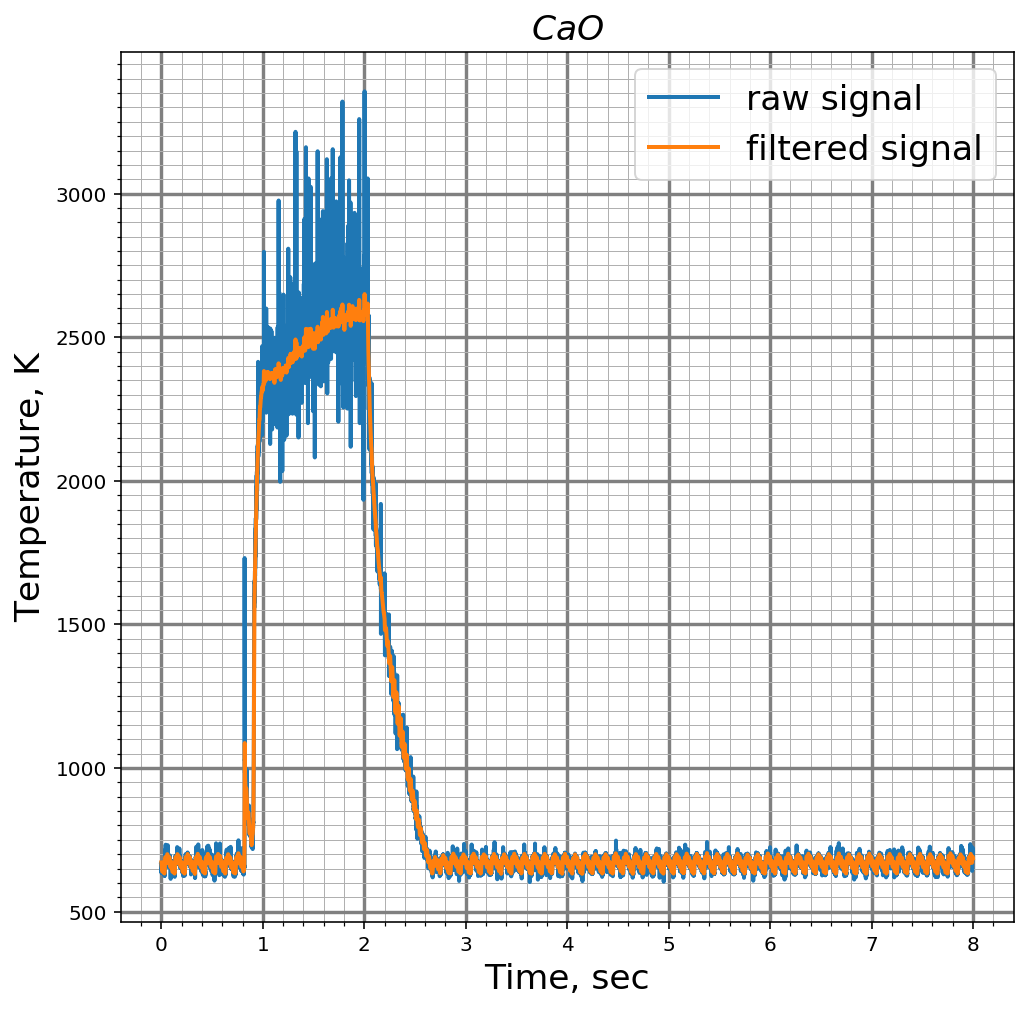

1


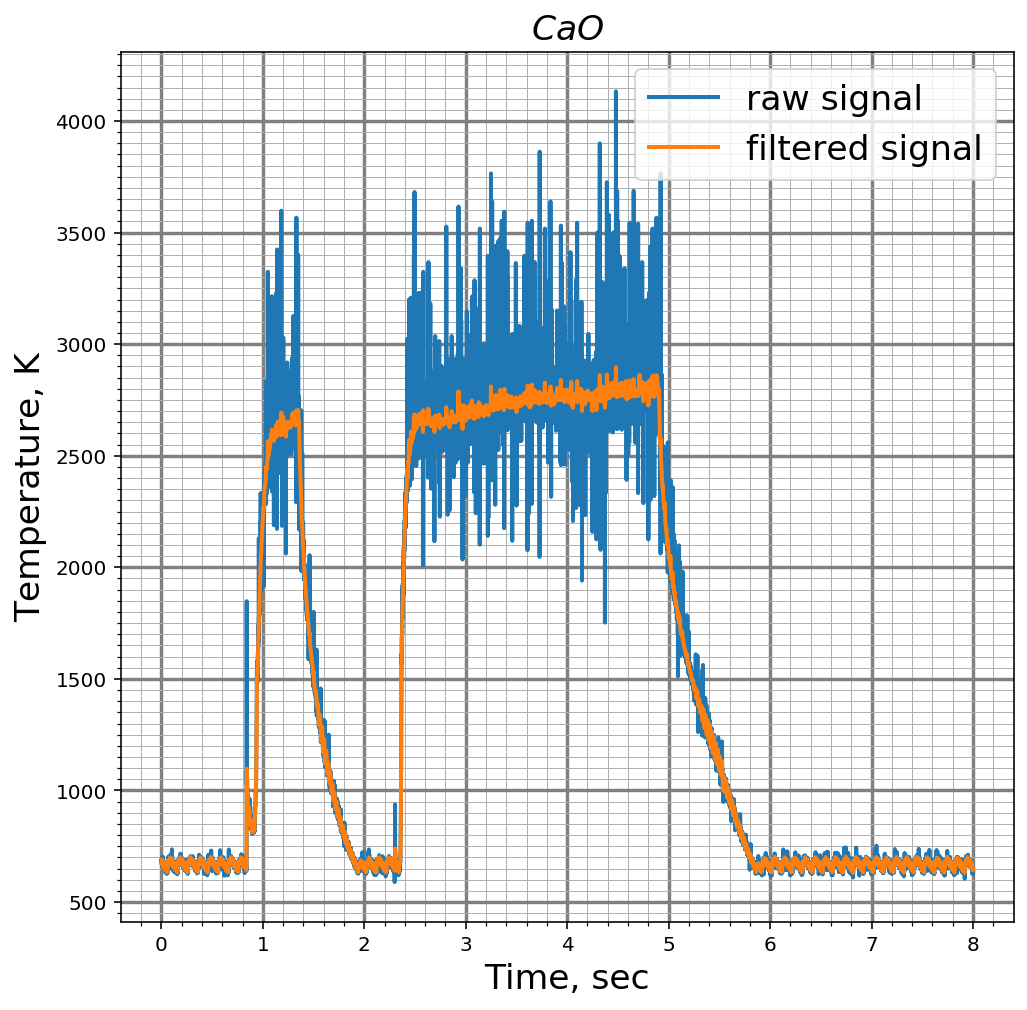

2


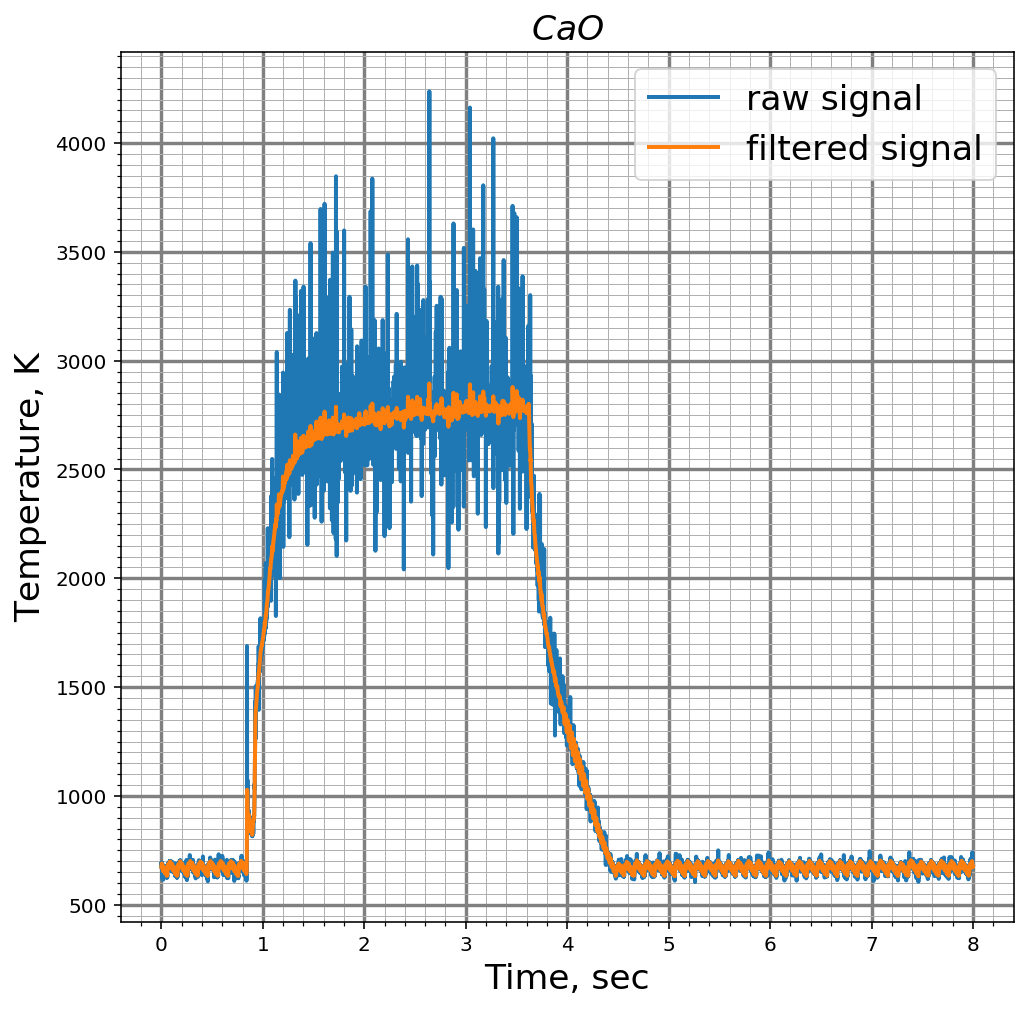

3


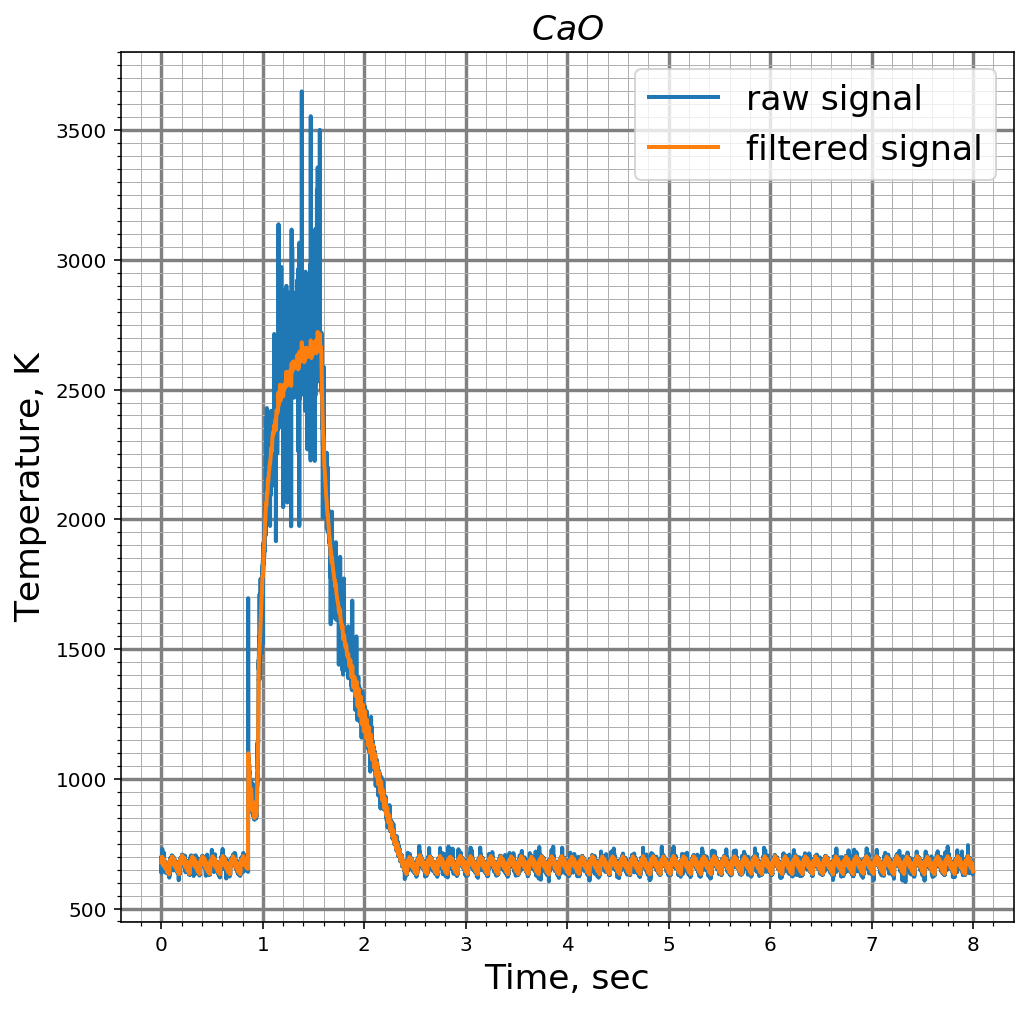

4


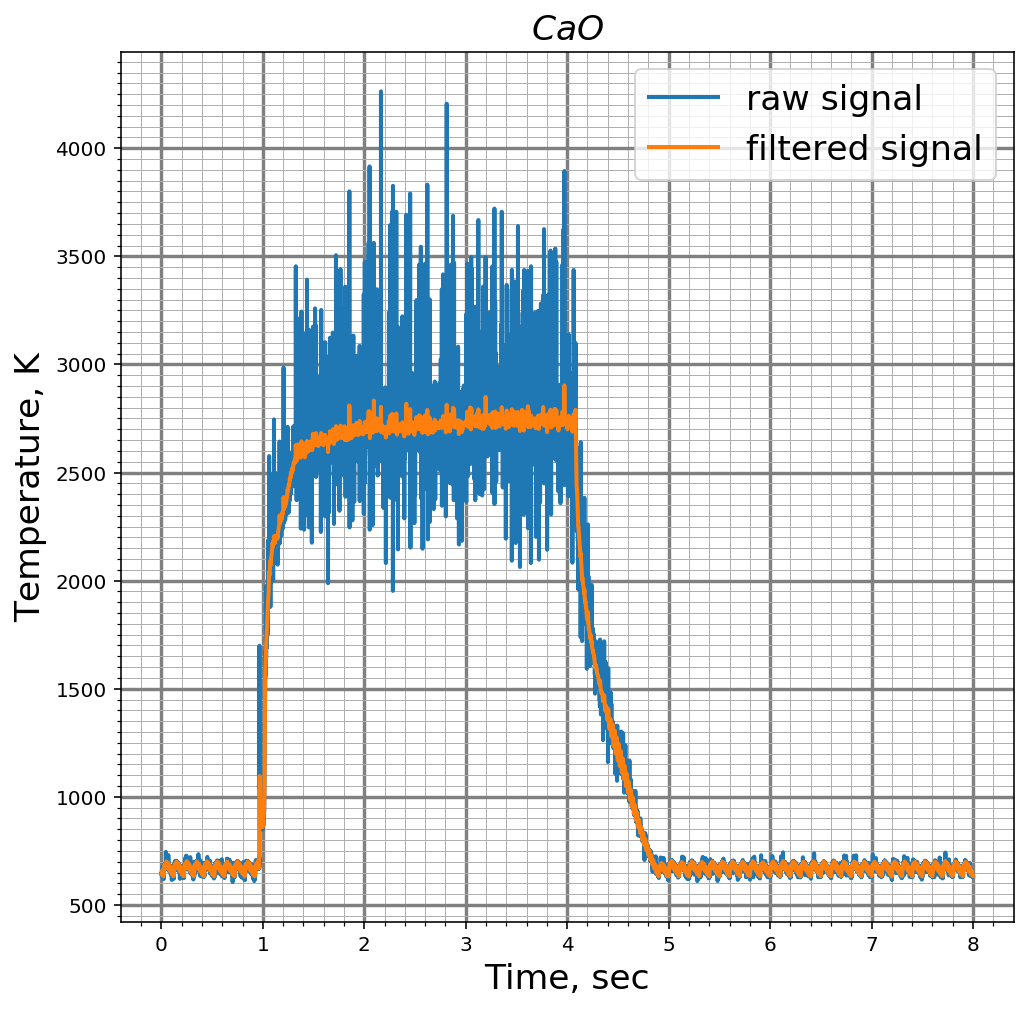

0


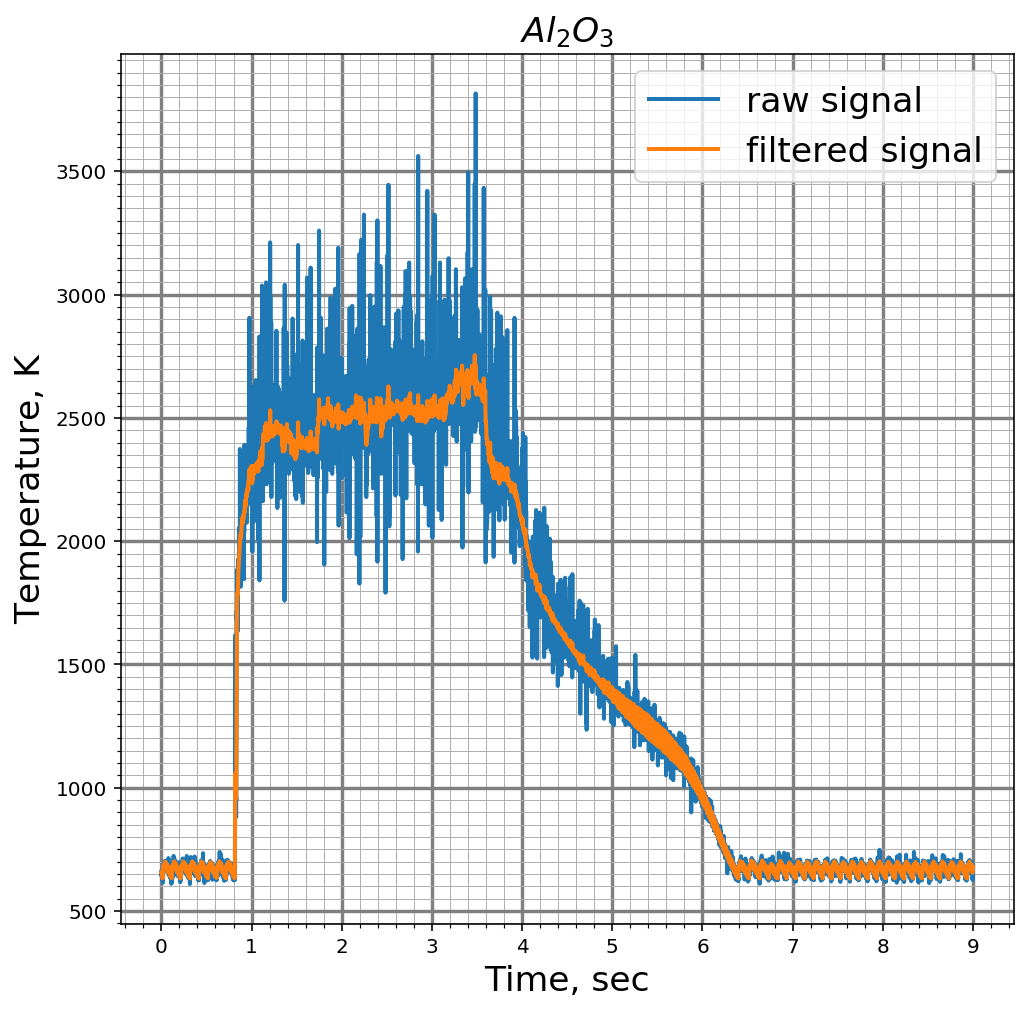

1


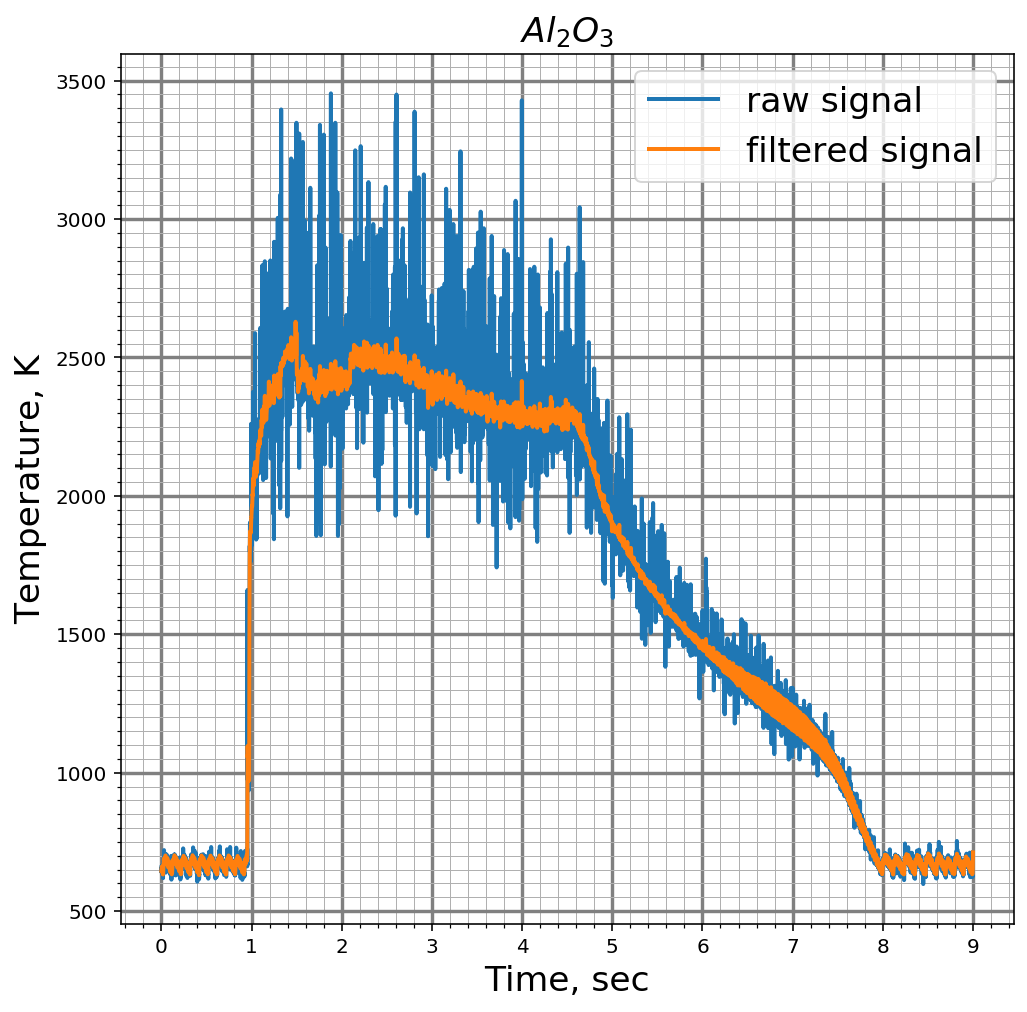

2


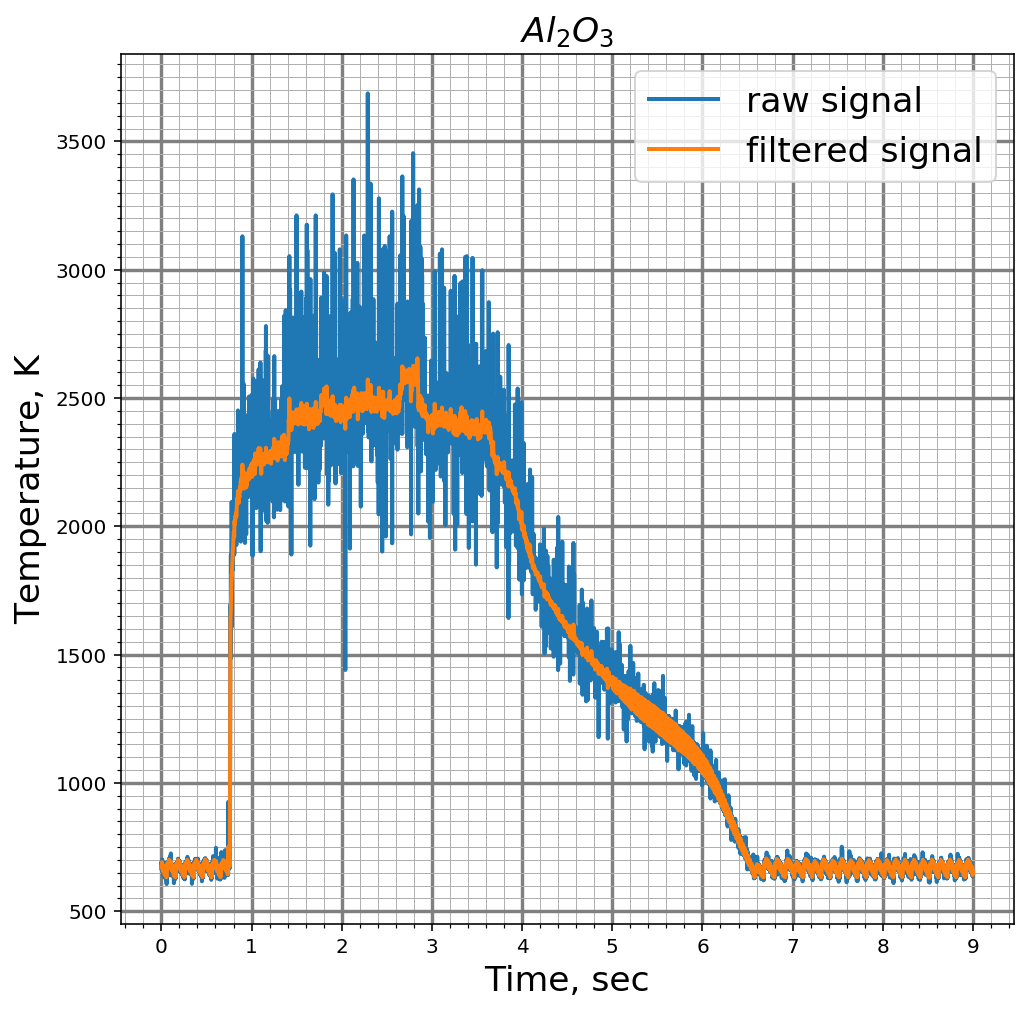

0


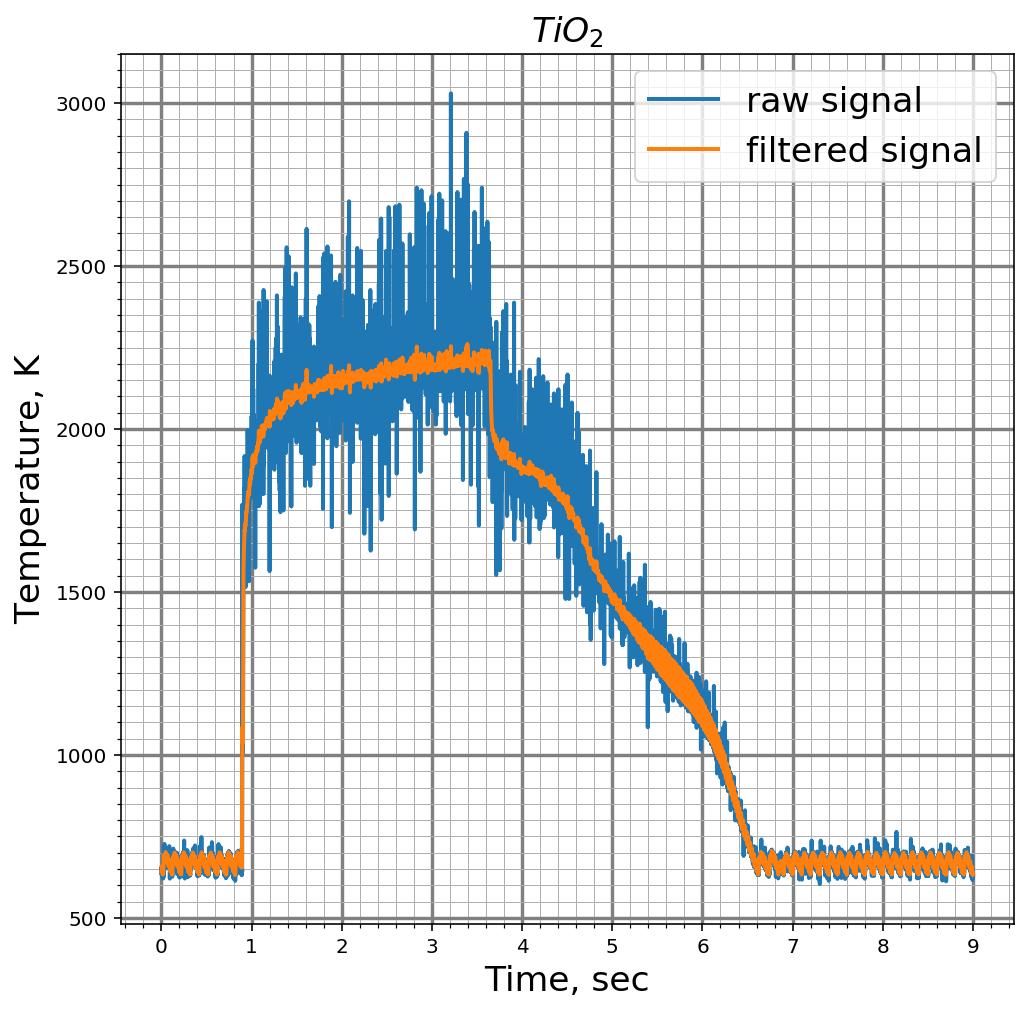

1


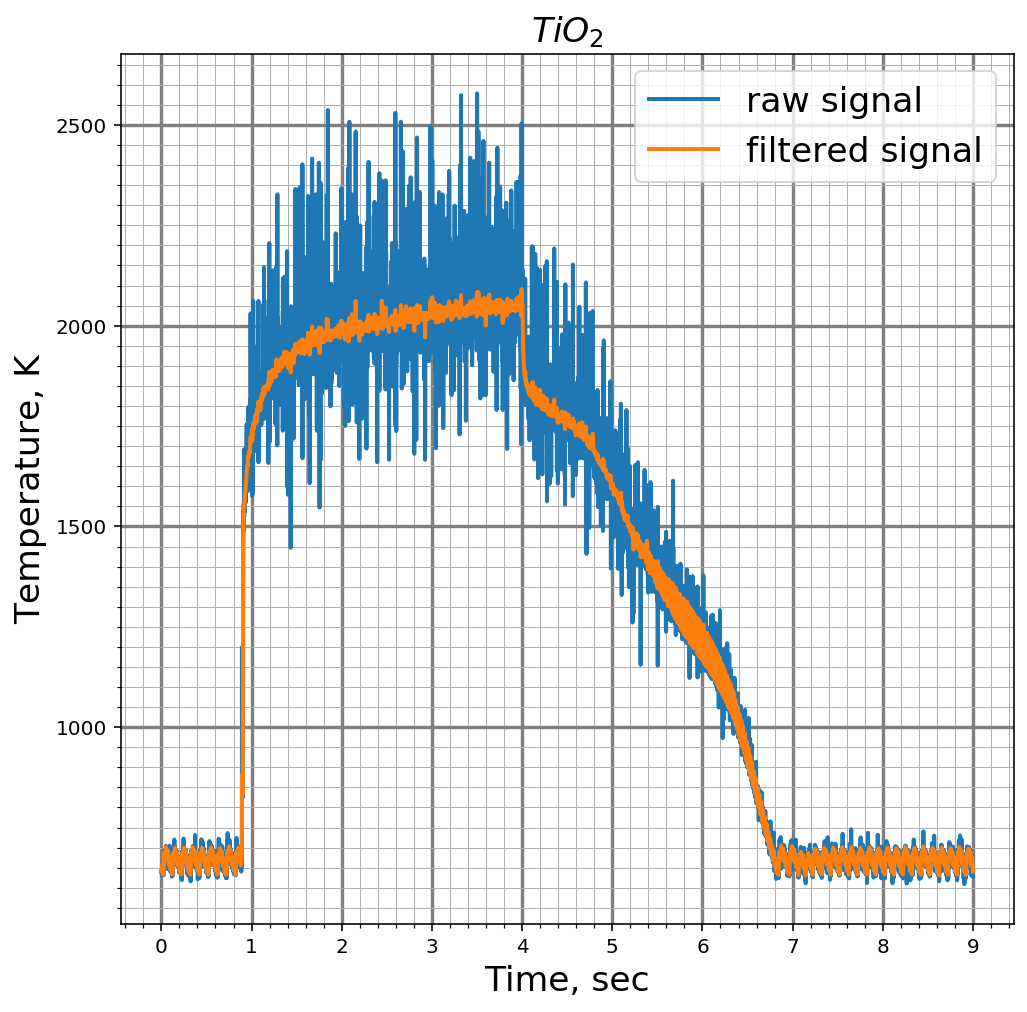

2


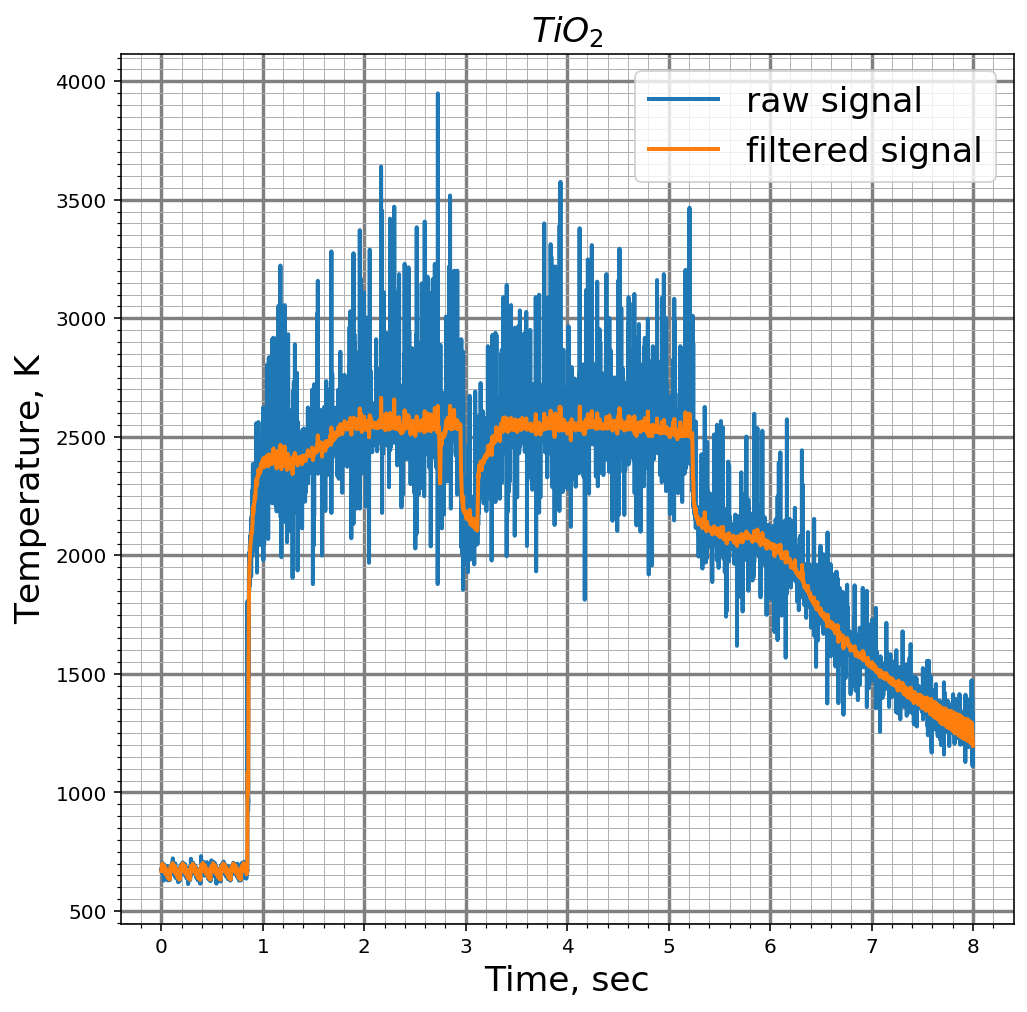

3


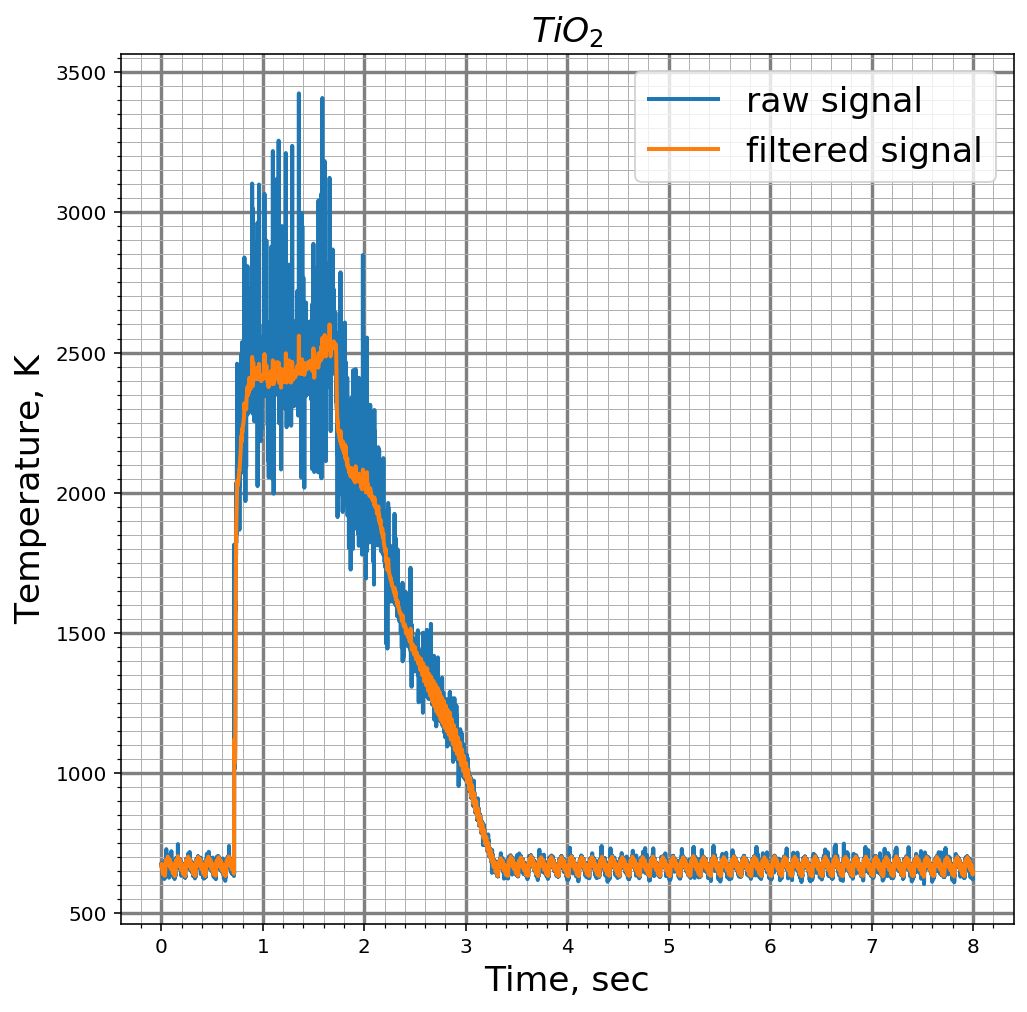

4


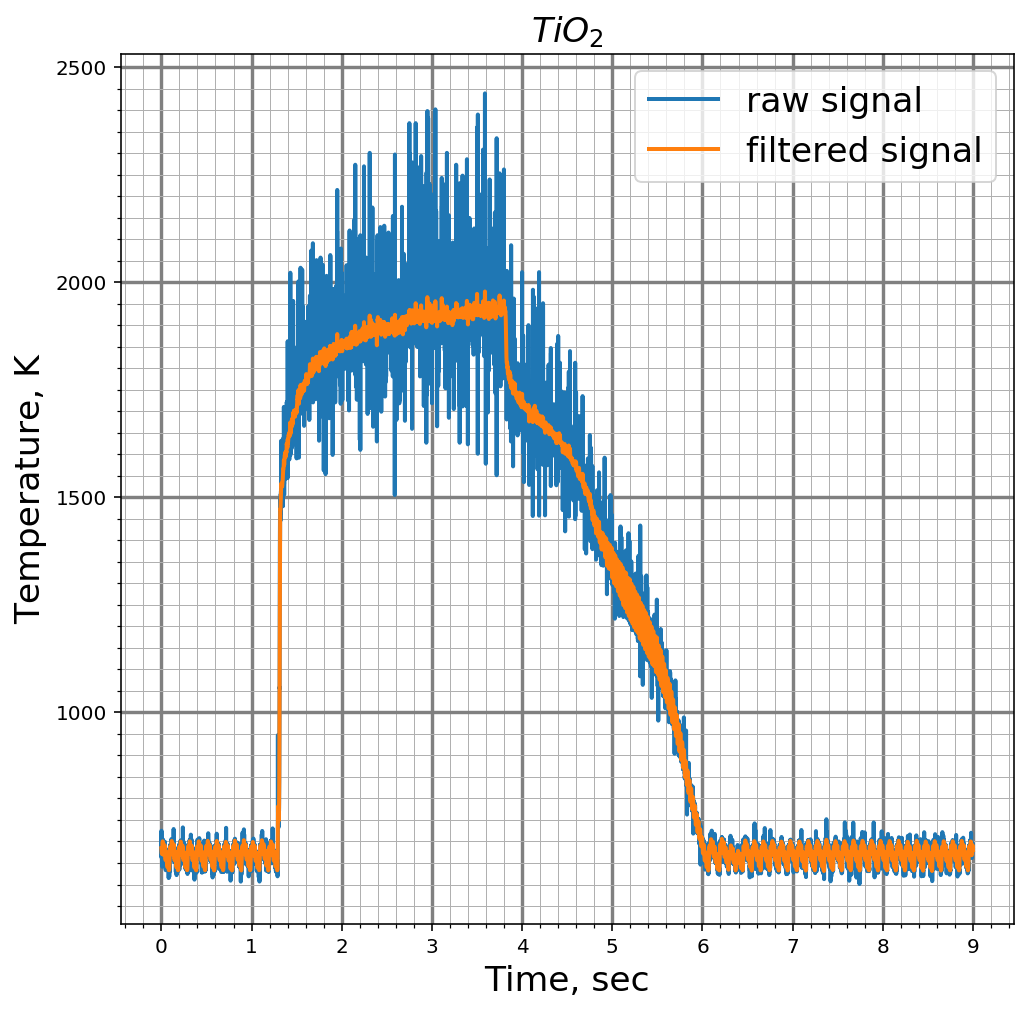

0


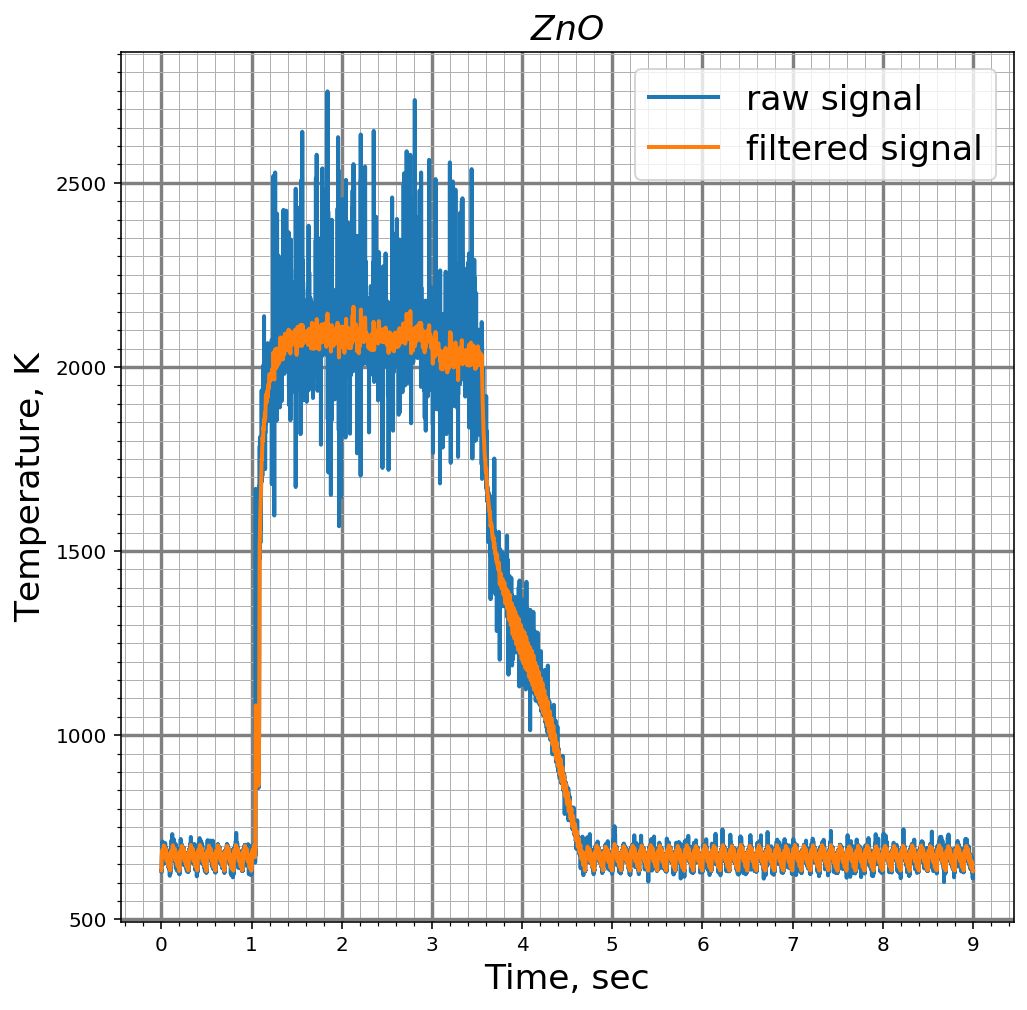

1


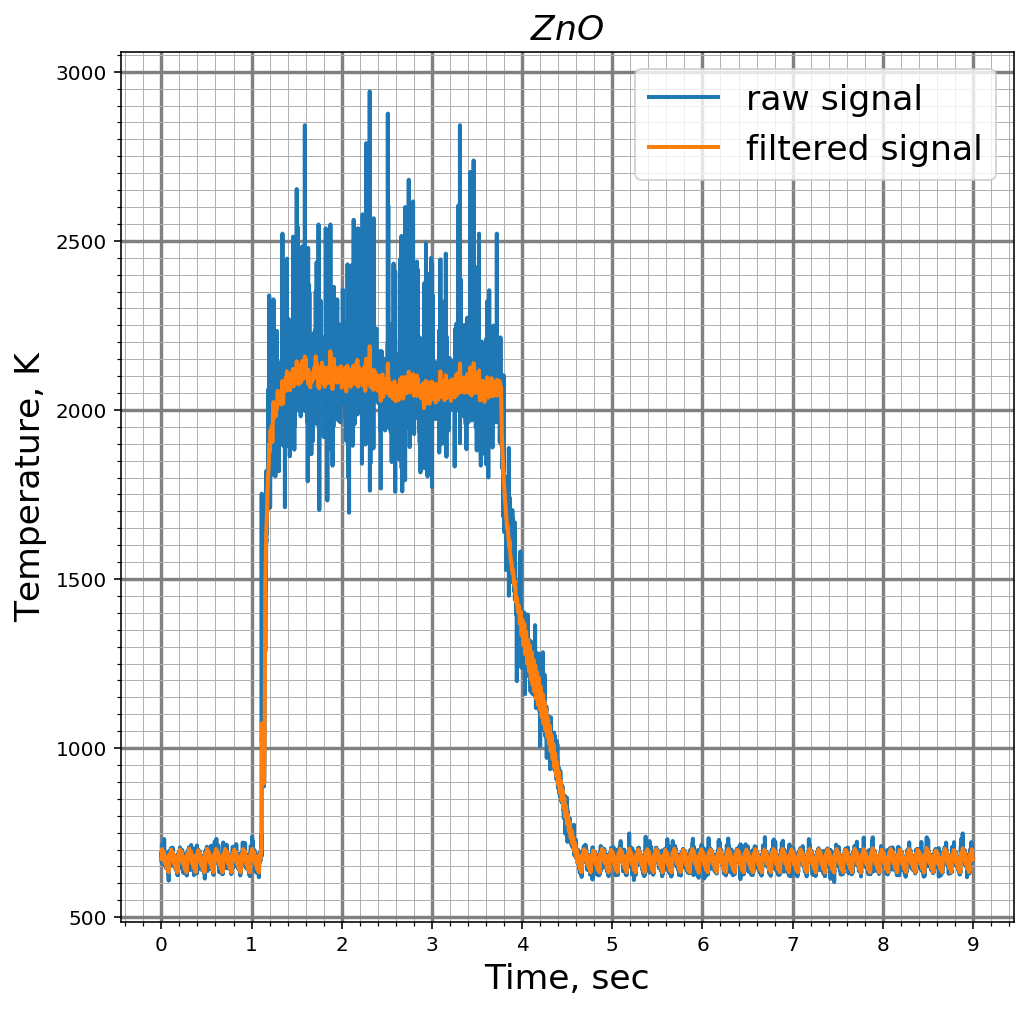

In [435]:
metals = [ca, al, ti, zn]
oxides = ['CaO', 'Al_2O_3', 'TiO_2', 'ZnO']
j = 0
for arr in metals:
    for i in range(len(arr)):
        print(i)
        plot_temp_curves(arr, i, oxides[j])
    j += 1

In [26]:
time, spectr = read_file("./Data/",'2097_up.txt', True)

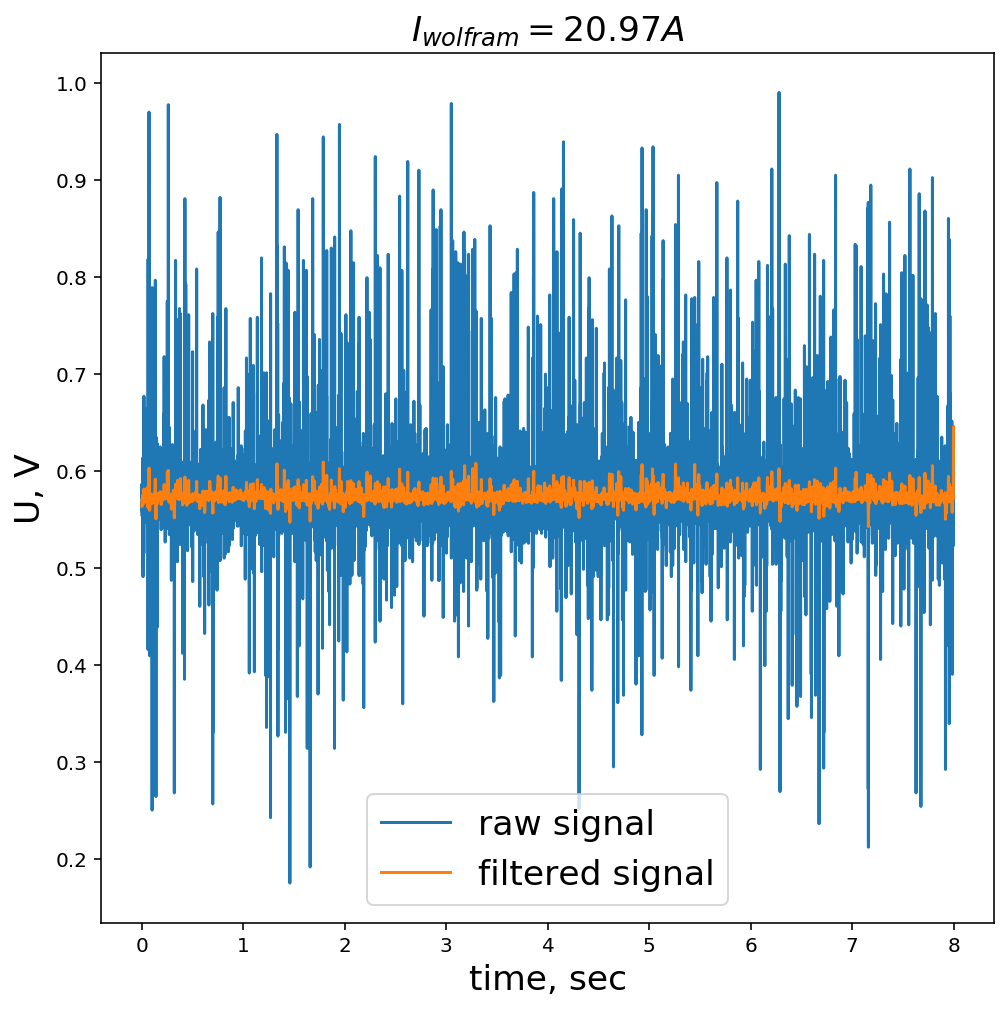

In [38]:
plt.figure(figsize=(8, 8))
plt.plot(time, spectr, label='raw signal')
plt.plot(time, filtfilt(b, a, spectr), label='filtered signal')
plt.legend(fontsize='xx-large')
plt.xlabel('time, sec', fontsize='xx-large')
plt.ylabel('U, V', fontsize='xx-large')
plt.title('$I_{wolfram}=20.97 A$', fontsize='xx-large')
plt.savefig('example_of_wolfram.png', dpi=300)